#CIFAR 10 dataset, 60000 32*32 colur images in 10 classes with 6000 image per class
#50000 training images and 10000 test images

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras


In [2]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

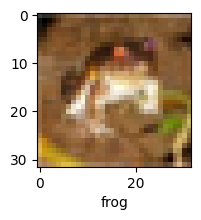

In [8]:
plot_sample(X_train,Y_train,0)

In [9]:
#preprocessing: Scale images: normalize
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [10]:
Y_train_categorical = keras.utils.to_categorical(Y_train, num_classes=10, dtype='float32')
Y_test_categorical = keras.utils.to_categorical(Y_test, num_classes=10, dtype='float32')


In [11]:
Y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#ANN

In [12]:
ann = models.Sequential([ 
    layers.Flatten(input_shape=(32,32,3)), 
    layers.Dense(3000, activation = 'relu'), 
    layers.Dense(1000, activation = 'relu'), 
    layers.Dense(10, activation = 'sigmoid')
  ])

ann.compile(optimizer='SGD',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train,Y_train, epochs = 5)


Epoch 1/5
 359/1563 [=====>........................] - ETA: 2:38 - loss: nan - accuracy: 0.0978

KeyboardInterrupt: ignored

In [13]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 11s 34ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("classification report: \n", classification_report(Y_test,Y_pred_classes))

#CNN

In [17]:
from sklearn.metrics.pairwise import kernel_metrics
cnn = models.Sequential([ 
    #cnn
    #detecting features, figuring out filters
    layers.Conv2D(filters=32, kernel_size= (3,3), activation = 'relu', input_shape= (32,32,3)),         
    layers.MaxPool2D(2,2),
    layers.Conv2D(filters=64, kernel_size= (3,3), activation = 'relu', input_shape= (32,32,3)),                
    layers.MaxPool2D(2,2),
    #dense
    layers.Flatten(),  
    layers.Dense(64, activation = 'relu'), 
    layers.Dense(10, activation = 'softmax')
  ])

cnn.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train,Y_train, epochs = 5)


Epoch 1/5
1563/1563 [==============================] - 83s 52ms/step - loss: 1.7941 - accuracy: 0.4109
Epoch 2/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.2850 - accuracy: 0.5439
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.1319 - accuracy: 0.6028
Epoch 4/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0225 - accuracy: 0.6441
Epoch 5/5
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9499 - accuracy: 0.6690


In [39]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [26]:
cnn.evaluate(X_test,Y_test)

TypeError: ignored

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[6.7298679e-04, 3.0363339e-04, 5.6315744e-03, 6.9886053e-01,
        4.5520696e-03, 2.2203510e-01, 6.3774131e-02, 1.4556233e-03,
        1.1682305e-03, 1.5461840e-03],
       [1.0935916e-01, 3.7017184e-01, 9.8481972e-04, 3.5426859e-04,
        5.9861668e-06, 6.1431219e-06, 8.9983841e-06, 3.0935782e-06,
        4.8990020e-01, 2.9205566e-02],
       [4.5206097e-01, 8.0269292e-02, 8.1638686e-02, 1.9483456e-02,
        6.3951211e-03, 2.5605378e-03, 3.2610979e-03, 2.2335101e-03,
        2.1674635e-01, 1.3535096e-01],
       [4.7499669e-01, 1.2155717e-01, 7.2071202e-02, 3.4936387e-02,
        2.4630673e-02, 3.6761875e-03, 3.1771105e-02, 4.4566160e-03,
        1.9690447e-01, 3.4999449e-02],
       [6.6608268e-06, 2.1896808e-06, 2.4118604e-02, 1.7020157e-02,
        1.6876525e-01, 1.2243667e-02, 7.7780741e-01, 3.3714296e-05,
        8.4558786e-07, 1.5088128e-06]], dtype=float32)

In [20]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

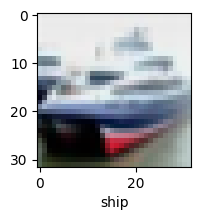

In [21]:
plot_sample(X_test, Y_test,1)

In [28]:
y_classes =[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [29]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

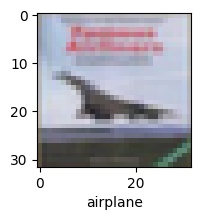

In [36]:
plot_sample(X_test, Y_test,3)

In [37]:
classes[y_classes[3]]

'airplane'